In [1]:
!pip install tweepy
!pip install pandas
!pip install vadersentiment

In [0]:
import pandas as pd
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [0]:
consumer_key='D9bEFGm5PbLrz0Zs13GHsIuFc'
consumer_secret='YD1VNc98CJGqlm3hU9Tqc6NQCIOttA8DBMPm4cZs2LNWuAa2jS'
access_key='988317695237029889-syutmcX4LwS51uKjiwodE0wHCZQN7QE'
access_secret='KL9CRufreRMeM0jgQbXVmBhcAncxpGuZ8ClvlCK25124C'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api= tweepy.API(auth)

In [0]:
import re
def clean_tweet(tweet):
  '''utility function to clean a text in a tweet by removing linksnand special characters regex'''
  return ''.join(re.sub("(@[A-Za-Z0-9]+)|([^0-9A-Za-z\t])|(\w+i\/\/\s+)"),'',tweet).split()
that_word = 'Depression'
tweets= api.search(that_word,count=100)

In [8]:
data=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweets'])
print(data.head(10))
print(tweets[0].created_at)


                                              Tweets
0  RT @dj_kicks_: Depression hits: \n\nMe: https:...
1  RT @jinjoonies: me: i think i finally feel oka...
2  RT @godlysIut: Depression, stress and anxiety ...
3  RT @shyyy_la: Only ABM students will know:\n\n...
4  RT @fakesmilesonly: Life problems as a child:\...
5  RT @pastoruyiosunde: Vote out Buhari and Atiku...
6  RT @godlysIut: Depression, stress and anxiety ...
7  RT @dj_kicks_: Depression hits: \n\nMe: https:...
8  @RBI @ICICIBank @HDFC_Bank @KotakBankLtd \nI w...
9  RT @lonelycitykid: My depression, anxiety, and...
2019-02-19 12:37:15


In [9]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweets,polarity
0,RT @dj_kicks_: Depression hits: \n\nMe: https:...,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp..."
1,RT @jinjoonies: me: i think i finally feel oka...,"{'neg': 0.327, 'neu': 0.598, 'pos': 0.076, 'co..."
2,"RT @godlysIut: Depression, stress and anxiety ...","{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'comp..."
3,RT @shyyy_la: Only ABM students will know:\n\n...,"{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp..."
4,RT @fakesmilesonly: Life problems as a child:\...,"{'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp..."
5,RT @pastoruyiosunde: Vote out Buhari and Atiku...,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp..."
6,"RT @godlysIut: Depression, stress and anxiety ...","{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'comp..."
7,RT @dj_kicks_: Depression hits: \n\nMe: https:...,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp..."
8,@RBI @ICICIBank @HDFC_Bank @KotakBankLtd \nI w...,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp..."
9,"RT @lonelycitykid: My depression, anxiety, and...","{'neg': 0.332, 'neu': 0.578, 'pos': 0.09, 'com..."


In [0]:
import matplotlib.pyplot as plt

In [0]:
# gloabl variable to store values
neg, neu, pos = 0, 0, 0

In [0]:
# taking values out of each tweet to add to our global variable
for tweet in data['polarity']:
  neg += tweet['neg']
  neu += tweet['neu']
  pos += tweet['pos']

In [0]:
labels = 'negative', 'neutral', 'positive'
sizes = [neg, neu, pos]
explode = (0.1, 0, 0)
colors = ['#EA8A8D', '#E9E9E9', '#3EDC81']

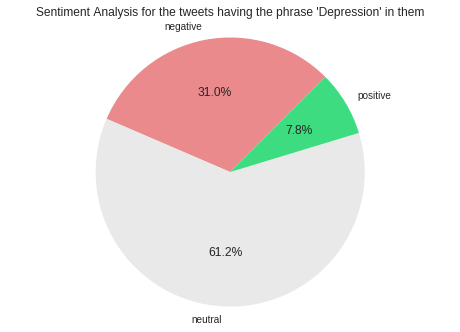

<Figure size 576x396 with 0 Axes>

In [14]:
ig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=45, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f"Sentiment Analysis for the tweets having the phrase 'Depression' in them")
fig1 = plt.gcf()

plt.show()
plt.draw()